# Analise de terremotos em Taiwan

### Taiwan (chinês tradicional: 臺灣 ou 台灣, chinês simplificado: 台湾), oficialmente República da China, é um Estado insular localizado na Ásia Oriental.


 Passo 1: No site https://scweb.cwa.gov.tw/en-us/earthquake/data/ existem registros de terremotos desde 1995, entretanto, para cada mês de cada ano há que se baixar um CSV diferente. Para automatizar o trabalho, irei utilizar a biblioteca pyautogui da seguinte forma. Irei anotar as coordenadas de cada botão usando pyautogui.position e depois irei criar um loop para automatizar o download de cada arquivo CSV.
   

In [61]:
# pip install pyautogui
!pip install TensorFlow

  Obtaining dependency information for TensorFlow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.16.1 from https://files.pythonhosted.org/packages/e0/36/6278e4e7e69a90c00e0f82944d8f2713dd85a69d1add455d9e50446837ab/tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2db

In [3]:
import pandas as pd
import pyautogui
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:

#try:
#    while True:
        # Localiza a posicao do mouse
#        x, y = pyautogui.position()
        
        # Printa a posicao
#        print('Mouse position: X = {}, Y = {}'.format(x, y))
        
        # Ajustando tempo de sleep antes de coletar nova posicao
#        pyautogui.sleep(1)
#except KeyboardInterrupt:
#    print('\nExiting...')

In [5]:
#pyautogui.pause = 2
#while True:
#    pyautogui.click(x=1287, y=369) # botao Query Conditions
#    time.sleep(0.2)
#    pyautogui.click(x=1221,y=484) #botao janeiro
#    time.sleep(0.2)
#    pyautogui.click(x=1759,y=371) #botao csv
#    time.sleep(0.2)
#    pyautogui.click(x=1287, y=369) # botao Query Conditions
#    time.sleep(0.2)
#    pyautogui.click(x=1278, y = 477) #botao fev
#    time.sleep(0.2)
#    pyautogui.click(x=1759,y=371) #botao csv
#    time.sleep(0.2)
#    pyautogui.click(x=1287, y=369) # botao Query Conditions
#    time.sleep(0.2)
#    pyautogui.click(x=1343, y = 483) # botao mar
#    time.sleep(0.2)
#    pyautogui.click(x=1759,y=371) #botao csv
#    time.sleep(0.2)
#    pyautogui.click(x=1287, y=369) # botao Query Conditions
#    time.sleep(0.2)
#    pyautogui.click(x=1404, y = 452) # botao abril
#    time.sleep(0.2)
#    pyautogui.click(x=1759,y=371) #botao csv
#    time.sleep(0.2)
#    pyautogui.click(x=1287, y=369) # botao Query Conditions
#    time.sleep(0.2)
#    pyautogui.click(x=1216, y = 555) # botao maio
#    time.sleep(0.2)
#    pyautogui.click(x=1759,y=371) #botao csv
#    time.sleep(0.2)
#    pyautogui.click(x=1287, y=369) # botao Query Conditions
#    time.sleep(0.2)
#    pyautogui.click(x=1280, y = 549) # botao junho
#    time.sleep(0.2)
#    pyautogui.click(x=1759,y=371) #botao csv
#    time.sleep(0.2)
#    pyautogui.click(x=1287, y=369) # botao Query Conditions
#    time.sleep(0.2)
#    pyautogui.click(x=1340, y = 552) # botao julho
#    time.sleep(0.2)
#    pyautogui.click(x=1759,y=371) #botao csv
#    time.sleep(0.2)
#    pyautogui.click(x=1287, y=369) # botao Query Conditions
#    time.sleep(0.2)
#    pyautogui.click(x=1405, y = 561) # botao agosto
#    time.sleep(0.2)
#    pyautogui.click(x=1759,y=371) #botao csv
#    time.sleep(0.2)
#    pyautogui.click(x=1287, y=369) # botao Query Conditions
#    time.sleep(0.2)
#    pyautogui.click(x=1216, y = 629) # botao setembro
#    time.sleep(0.2)
#    pyautogui.click(x=1759,y=371) #botao csv
#    time.sleep(0.2)
#    pyautogui.click(x=1287, y=369) # botao Query Conditions
#    time.sleep(0.2)
#    pyautogui.click(x=1278, y = 626) # botao outubro
#    time.sleep(0.2)
#    pyautogui.click(x=1759,y=371) #botao csv
#    time.sleep(0.2)
#    pyautogui.click(x=1287, y=369) # botao Query Conditions
#    time.sleep(0.2)
#    pyautogui.click(x=1346, y = 621) # botao novembro
#    time.sleep(0.2)
#    pyautogui.click(x=1759,y=371) #botao csv
#    time.sleep(0.2)
#    pyautogui.click(x=1287, y=369) # botao Query Conditions
#    time.sleep(0.2)
#    pyautogui.click(x=1407, y = 622) # botao Dezembro
#    time.sleep(0.2)
#    pyautogui.click(x=1759,y=371) #botao csv
#    time.sleep(0.2)
#    pyautogui.click(x=1287, y=369) # botao Query Conditions
#    time.sleep(0.2)
#    pyautogui.click(x=1419,y=431) #botao prosseguir
#    time.sleep(0.2)

Com todos as 357 tabelas em mãos, juntei e limpei todas elas em um unico dataframe usando PowerBI e Python.

No PowerBI:
- Fundi as 357 tabelas em uma única
- Eliminei as colunas numero e local
- Atribuí os nomes das colunas como headers
- Eliminei as linhas que tinham os nomes repetidos das colunas
No Python:
- Acabei de notar que eu esqueci de eliminar a coluna Location, isso será feito agora
- Separei a coluna 'Orgin date' nas colunas de data e hora

O resultado final foi atribuído a uma variável chamada tremores

In [6]:
tremores = pd.read_csv(r"C:\Users\alvar\OneDrive\Área de Trabalho\Earthquakes\Earthquakes compiled.csv")

In [7]:
tremores.head()

,Orgin date,Location,Latitude(N),Longitude(E),Magnitude,Depth
0,2008-06-01 09:57:15,19.45N 121.10E,19.4500,121.100,6.4,41.9
1,2013-09-06 19:33:51,20.05N 122.28E,20.0500,122.280,6.8,206.2
2,2000-07-16 11:21:47,20.51N 122.23E,20.5100,122.230,6.7,33.0
3,2020-04-11 00:44:57,20.54N 122.17E,20.5400,122.170,6.5,179.4
4,2023-08-13 09:43:10,20.55N 121.47E,20.5523,121.473,6.0,84.0


In [8]:
tremores.drop('Location', axis=1, inplace=True)

In [9]:
tremores['Orgin date'] = pd.to_datetime(tremores['Orgin date'])

# Create new columns for date and time
tremores['Date'] = tremores['Orgin date'].dt.date
tremores['Time'] = tremores['Orgin date'].dt.time
tremores.drop('Orgin date', axis=1, inplace=True)

In [10]:
tremores.head()

,Latitude(N),Longitude(E),Magnitude,Depth,Date,Time
0,19.4500,121.100,6.4,41.9,2008-06-01,09:57:15
1,20.0500,122.280,6.8,206.2,2013-09-06,19:33:51
2,20.5100,122.230,6.7,33.0,2000-07-16,11:21:47
3,20.5400,122.170,6.5,179.4,2020-04-11,00:44:57
4,20.5523,121.473,6.0,84.0,2023-08-13,09:43:10


In [11]:
tremores.sort_values(by='Date', inplace=True)

In [12]:
tremores.head()

,Latitude(N),Longitude(E),Magnitude,Depth,Date,Time
13584,24.96,121.70,4.5,91.5,1995-01-05,06:14:55
4502,23.68,121.43,5.1,3.8,1995-01-10,15:55:19
3071,23.30,120.76,4.5,14.3,1995-01-19,19:39:08
1754,23.05,120.19,4.2,16.0,1995-01-24,16:45:23
5026,23.76,121.92,5.2,24.6,1995-02-10,10:21:59


In [13]:
tremores = tremores[["Date","Time","Latitude(N)","Longitude(E)", "Magnitude", "Depth"]]
tremores.head()

,Date,Time,Latitude(N),Longitude(E),Magnitude,Depth
13584,1995-01-05,06:14:55,24.96,121.70,4.5,91.5
4502,1995-01-10,15:55:19,23.68,121.43,5.1,3.8
3071,1995-01-19,19:39:08,23.30,120.76,4.5,14.3
1754,1995-01-24,16:45:23,23.05,120.19,4.2,16.0
5026,1995-02-10,10:21:59,23.76,121.92,5.2,24.6


### Com o dataset organizado como gostaria, é hora de aplicar algumas estatísticas descritivas para entendê-lo

In [14]:
tremores.dtypes

Date             object
Time             object
Latitude(N)     float64
Longitude(E)    float64
Magnitude       float64
Depth           float64
dtype: object

In [15]:
tremores.describe()

,Latitude(N),Longitude(E),Magnitude,Depth
count,13671.000000,13671.000000,13671.000000,13671.000000
mean,23.823012,121.452237,3.705925,19.006839
std,0.655277,0.507765,0.746579,19.253892
min,19.450000,117.980000,1.300000,0.100000
25%,23.410000,121.220000,3.200000,8.700000
50%,23.990000,121.580000,3.600000,13.600000
75%,24.260000,121.750000,4.100000,21.500000
max,25.970000,125.510000,7.200000,312.000000


In [16]:
tremores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13671 entries, 13584 to 9468
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          13671 non-null  object 
 1   Time          13671 non-null  object 
 2   Latitude(N)   13671 non-null  float64
 3   Longitude(E)  13671 non-null  float64
 4   Magnitude     13671 non-null  float64
 5   Depth         13671 non-null  float64
dtypes: float64(4), object(2)
memory usage: 747.6+ KB


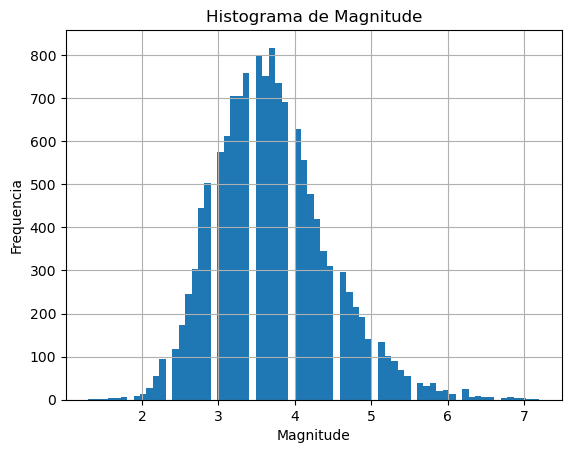

In [17]:
tremores.hist(column='Magnitude', bins=70)  
plt.xlabel('Magnitude')
plt.ylabel('Frequencia')
plt.title('Histograma de Magnitude')
plt.show()


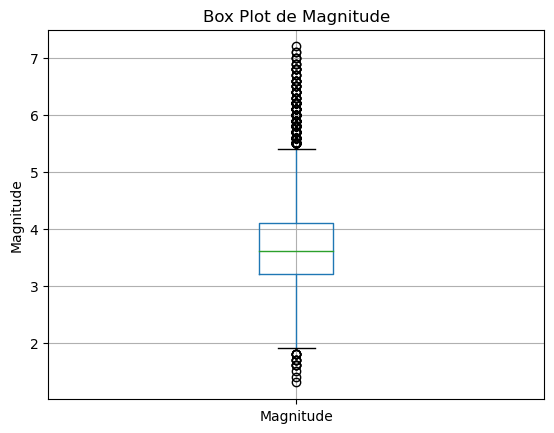

In [18]:
tremores.boxplot(column='Magnitude')
plt.ylabel('Magnitude')
plt.title('Box Plot de Magnitude')
plt.show()

Os graficos acima demonstram uma distribuição quase normal, enviesado para a esquerda e uma quantidade razoável de outliers, de modo que não me parece fazer sentido removê-los

### A partir de aqui irei tentar procurar padrões nos dados através de gráficos

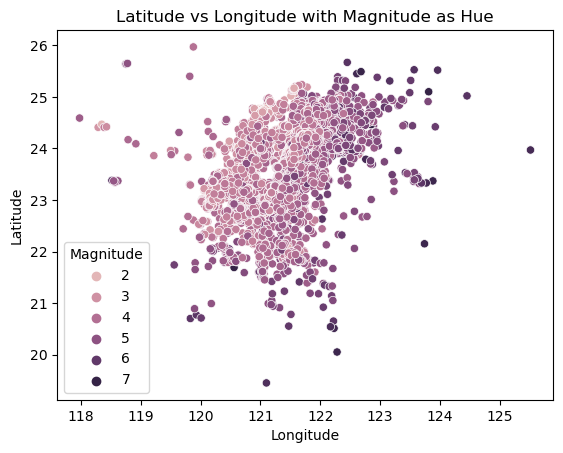

In [19]:
import seaborn as sns

# Assuming your data is stored in a DataFrame called 'data'
sns.scatterplot(x='Longitude(E)', y='Latitude(N)', hue='Magnitude', data=tremores)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Latitude vs Longitude with Magnitude as Hue')
plt.legend(title='Magnitude')
plt.show()

Conclusões: Me parece que a costa leste tem tremores mais fortes

## Plotando gráficos para buscar padrões

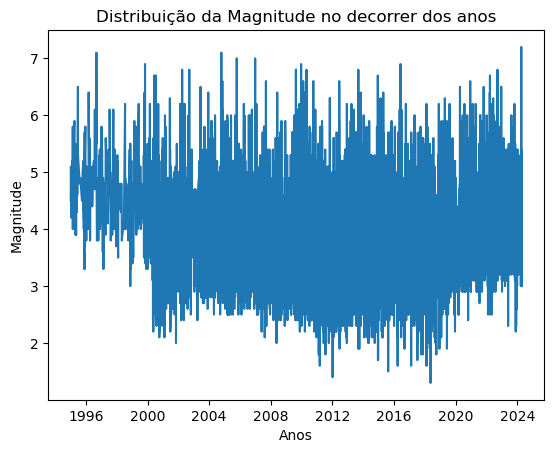

In [20]:

plt.plot(tremores['Date'], tremores['Magnitude'])
plt.xlabel('Anos')
plt.ylabel('Magnitude')
plt.title('Distribuição da Magnitude no decorrer dos anos')
plt.show()

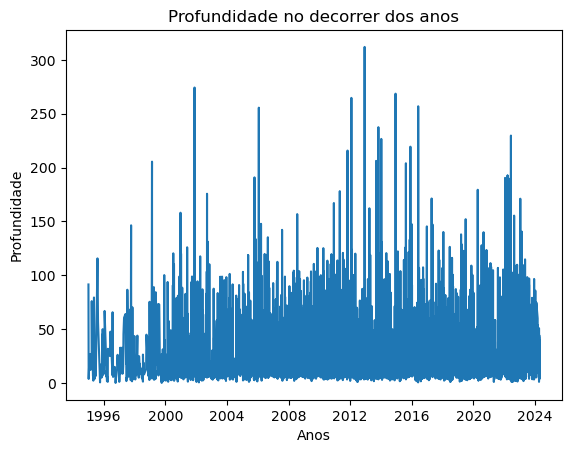

In [21]:
plt.plot(tremores['Date'], tremores['Depth'])
plt.xlabel('Anos')
plt.ylabel('Profundidade')
plt.title('Profundidade no decorrer dos anos')
plt.show()

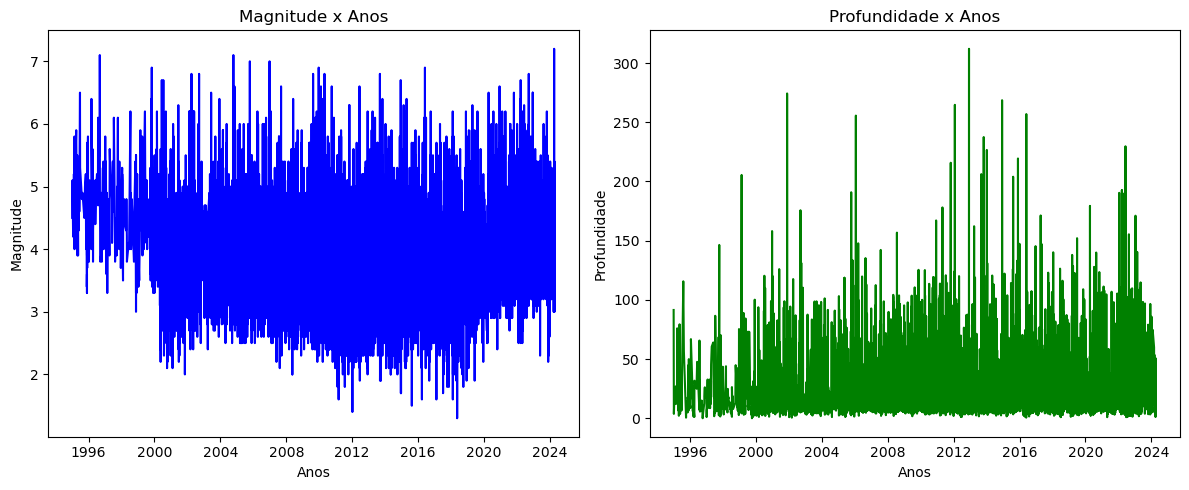

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Magnitude x Tempo
axes[0].plot(tremores['Date'], tremores['Magnitude'], color='blue')
axes[0].set_xlabel('Anos')
axes[0].set_ylabel('Magnitude')
axes[0].set_title('Magnitude x Anos')

# Profundidade vs Tempo
axes[1].plot(tremores['Date'], tremores['Depth'], color='green')
axes[1].set_xlabel('Anos')
axes[1].set_ylabel('Profundidade')
axes[1].set_title('Profundidade x Anos')

plt.tight_layout()  
plt.show()

In [23]:
correlation = tremores['Depth'].corr(tremores['Magnitude'])
print("Correlação entre Depth e Magnitude:", correlation)

Correlação entre Depth e Magnitude: 0.4085125495596888


A correlação de 0.4 é positiva e moderada.

Analisando a curva Magnitude, me parece que ela encaixa numa curva senoidal

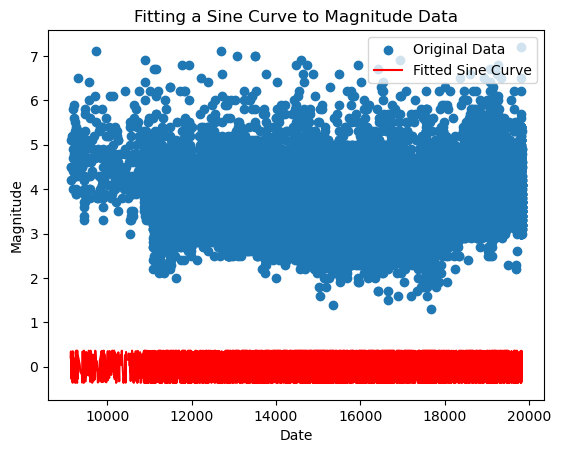

In [24]:
from matplotlib.dates import date2num

# Convert 'Date' column to datetime format
tremores['Date'] = pd.to_datetime(tremores['Date'])

# Convert datetime to numeric using matplotlib's date2num function
x = date2num(tremores['Date'])
y = tremores['Magnitude']

# Define the function to fit (sine function)
def sine_function(x, a, b, c):
    return a * np.sin(b * x + c)

# Fit the sine function to the data
popt, pcov = curve_fit(sine_function, x, y)

# Plot the original data and the fitted sine curve
plt.scatter(x, y, label='Original Data')
plt.plot(x, sine_function(x, *popt), color='red', label='Fitted Sine Curve')
plt.xlabel('Date')
plt.ylabel('Magnitude')
plt.title('Fitting a Sine Curve to Magnitude Data')
plt.legend()
plt.show()

In [25]:
from sklearn.metrics import r2_score

# Calculate predicted values using the fitted model
predicted_y = sine_function(x, *popt)

# Calculate R^2 score
r_squared = r2_score(y, predicted_y)
print("R^2 Score:", r_squared)

R^2 Score: -24.524169357538455


Este resultado significa que uma simples curva seno é bem incapaz de modelar terremotos

Meu próximo passo é tentar uma regressão linear, a partir dos dados normalizados

In [43]:


x = tremores[['Magnitude']]
y = tremores['Depth']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_scaled = scaler.fit_transform(x)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# Convert the scaled data back to DataFrame format if needed
X_scaled_df = pd.DataFrame(X_scaled, columns=x.columns)
y_scaled_series = pd.Series(y_scaled.flatten(), name='Depth')


x_train, x_test, y_train, y_test = train_test_split(X_scaled, y_scaled,train_size=0.6)



In [44]:
linear = LinearRegression()

In [45]:
linear.fit(x_train, y_train)

LinearRegression()

In [46]:
y_pred = linear.predict(x_test)

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Mean Absolute Error (MAE)
LinearRegression_MAE = mean_absolute_error(y_test, y_pred)

# Mean Squared Error (MSE)
LinearRegression_MSE = mean_squared_error(y_test, y_pred)

# Coefficient of Determination (R^2)
LinearRegression_R2 = r2_score(y_test, y_pred)

In [48]:
print("MAE:", LinearRegression_MAE)
print("MSE:", LinearRegression_MSE)
print("R2:", LinearRegression_R2)

MAE: 0.03341645732578598
MSE: 0.0029256220201222434
R2: 0.16153569578948856


A proxima tentativa é usar kNN e ver se o modelo melhora

Checando o melhor k

In [49]:
# Decidindo k entre 1 e 70
k_value_min = 1
k_value_max = 70


k_list = np.linspace(k_value_min,k_value_max,num=70,dtype=int)

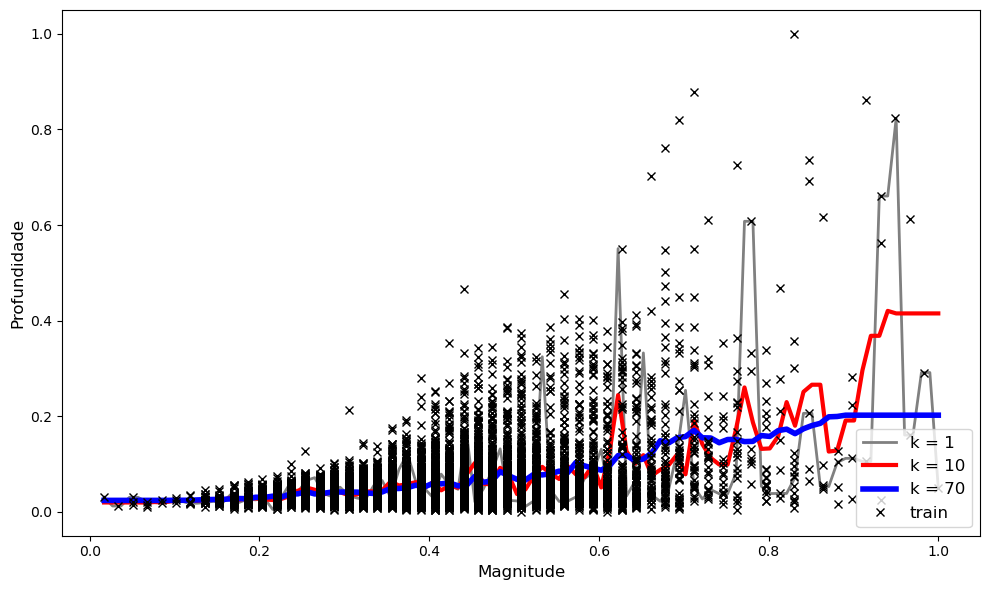

In [50]:

fig, ax = plt.subplots(figsize=(10, 6))


knn_dict = {}
j = 0

colors = ['grey', 'r', 'b']

for k_value in k_list:
    model = KNeighborsRegressor(n_neighbors=int(k_value))
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    MSE = mean_squared_error(y_test, y_pred)


    knn_dict[k_value] = MSE


    if k_value in [1, 10, 70]:
        xvals = np.linspace(x_train.min(), x_train.max(), 100)
        ypreds = model.predict(xvals.reshape(-1, 1))
        ax.plot(xvals, ypreds, '-', label=f'k = {int(k_value)}', linewidth=j + 2, color=colors[j])
        j += 1


ax.plot(x_train, y_train, 'x', label='train', color='k')


ax.legend(loc='lower right', fontsize=12)
ax.set_xlabel('Magnitude', fontsize=12)
ax.set_ylabel('Profundidade', fontsize=12)

plt.tight_layout()
plt.show()

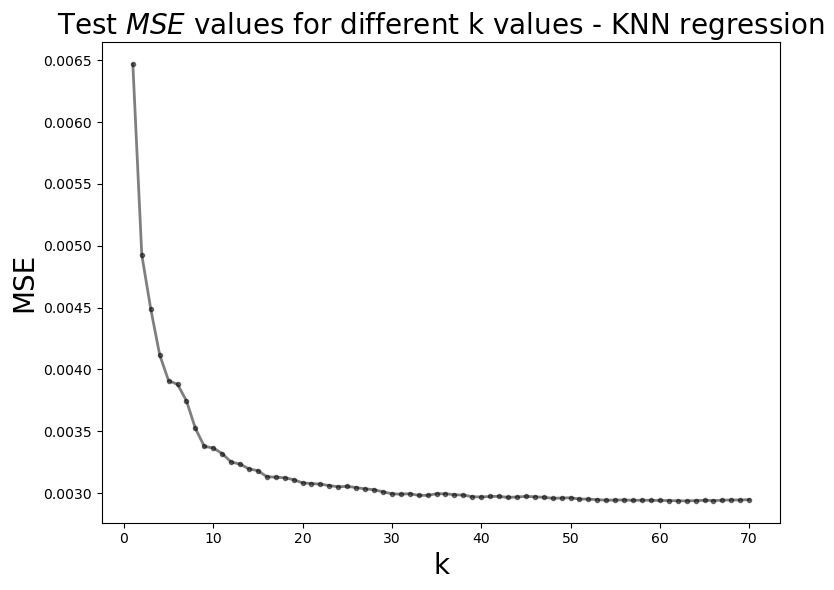

In [51]:

k_values = list(knn_dict.keys())
mse_values = list(knn_dict.values())
plt.figure(figsize=(8, 6))
plt.plot(k_values, mse_values, 'k.-', alpha=0.5, linewidth=2)


plt.xlabel('k', fontsize=20)
plt.ylabel('MSE', fontsize=20)
plt.title('Test $MSE$ values for different k values - KNN regression', fontsize=20)
plt.tight_layout()
plt.show()

In [52]:
min_mse = min(mse_values)
best_model = [k_value for k_value, MSE in knn_dict.items() if MSE == min_mse]
print("O melhor valor de k é ", best_model, "com um MSE de ", min_mse)


O melhor valor de k é  [63] com um MSE de  0.00293770324472591


Agora que temos definido o melhor k, iremos usa-lo para treinar nosso modelo

In [53]:
KNN = KNeighborsRegressor(n_neighbors=63)

# Train the model using the training data
KNN.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=63)

In [54]:
predictions = KNN.predict(x_test)

In [55]:
# Mean Absolute Error (MAE)
KNeighborsRegressor_MAE = mean_absolute_error(y_test, y_pred)

# Mean Squared Error (MSE)
KNeighborsRegressor_MSE = mean_squared_error(y_test, y_pred)

# Coefficient of Determination (R^2)
KNeighborsRegressor_R2 = r2_score(y_test, y_pred)

print("MAE:", KNeighborsRegressor_MAE)
print("MSE:", KNeighborsRegressor_MSE)
print("R2:", KNeighborsRegressor_R2)

MAE: 0.03301434917829894
MSE: 0.0029482588077229138
R2: 0.15504813921703575


Tentando um modelo de Redes Neurais

In [74]:


x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

# Combine training and validation sets for training
x_train_combined = np.concatenate((x_train, x_val))
y_train_combined = np.concatenate((y_train, y_val))

# Define the number of features
num_features = x_train_combined.shape[1]

# Define the architecture of the neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(num_features,)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer with linear activation for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(x_train_combined, y_train_combined, epochs=100, batch_size=32, verbose=1)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(x_test, y_test, verbose=0)
test_pred = model.predict(x_test)
test_r2 = r2_score(y_test, test_pred)

print("Test MAE:", test_mae)
print("Test MSE:", test_loss)  # This is the test MSE, same as test_loss from model evaluation
print("Test R2:", test_r2)

Epoch 1/100


C:\Users\alvar\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 685us/step - loss: 0.0041 - mean_absolute_error: 0.0366 
Epoch 2/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - loss: 0.0038 - mean_absolute_error: 0.0361
Epoch 3/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - loss: 0.0039 - mean_absolute_error: 0.0372
Epoch 4/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - loss: 0.0030 - mean_absolute_error: 0.0346
Epoch 5/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - loss: 0.0035 - mean_absolute_error: 0.0359
Epoch 6/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - loss: 0.0040 - mean_absolute_error: 0.0354
Epoch 7/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - loss: 0.0041 - mean_absolute_error: 0.0370
Epoch 8/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - loss: 0.0037 - mean_absolute_error: 0.0356
Epoch 9/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - loss: 0.0038 - mean_absolute_error: 0.0342
Epoch 10/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - loss: 0.0034 - mean_absolute_error: 0.0355
Epoch 11/100
61/61 ━━━━━━━━━━━

In [75]:
from tabulate import tabulate

evaluation_data = {
    "Model": ["Linear Regression", "K-Nearest Neighbors", 'Neural Network'],
    "MAE": [LinearRegression_MAE, KNeighborsRegressor_MAE, test_mae],
    "MSE": [LinearRegression_MSE, KNeighborsRegressor_MSE, test_loss],
    "R^2": [LinearRegression_R2, KNeighborsRegressor_R2, test_r2]
}

evaluation_df = pd.DataFrame(evaluation_data)

print(tabulate(evaluation_df, headers='keys', tablefmt='pretty'))

+---+---------------------+----------------------+-----------------------+----------------------+
|   |        Model        |         MAE          |          MSE          |         R^2          |
+---+---------------------+----------------------+-----------------------+----------------------+
| 0 |  Linear Regression  | 0.03341645732578598  | 0.0029256220201222434 | 0.16153569578948856  |
| 1 | K-Nearest Neighbors | 0.03301434917829894  | 0.0029482588077229138 | 0.15504813921703575  |
| 2 |   Neural Network    | 0.033627498894929886 |  0.00330513808876276  | 0.052768929381372676 |
+---+---------------------+----------------------+-----------------------+----------------------+


Conclusão: Após a normalização, a regressão linear faz um trabalho melhor de previsão, ainda que muito ruim